In [32]:
import os
import pandas as pd
import scanpy as sc
import numpy as np

In [33]:
## set working directory
os.chdir("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/")

In [34]:
## download result from cluster
## read into python

In [35]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.2.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.0 pynndescent==0.5.6


In [5]:
## read data
adata = sc.read_h5ad("./ibd_20220111.bbknn_umap_leiden_marker.h5ad")

In [6]:
## show adata
adata

AnnData object with n_obs × n_vars = 1376376 × 2000
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
## reorder
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [8]:
## show adata
adata

AnnData object with n_obs × n_vars = 1376376 × 2000
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

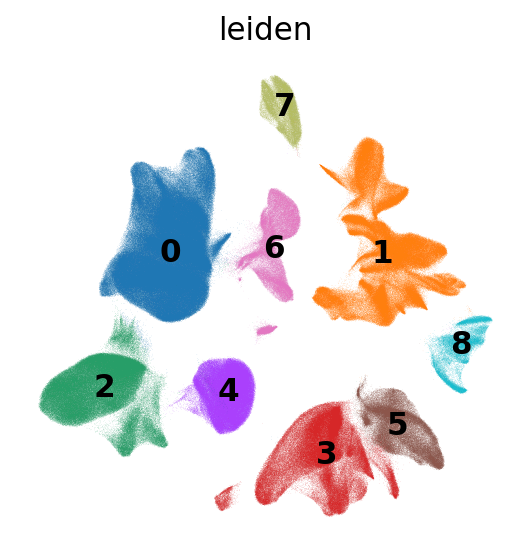

In [38]:
## check batch
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["leiden"], frameon=False, legend_loc='on data', legend_fontsize=14)

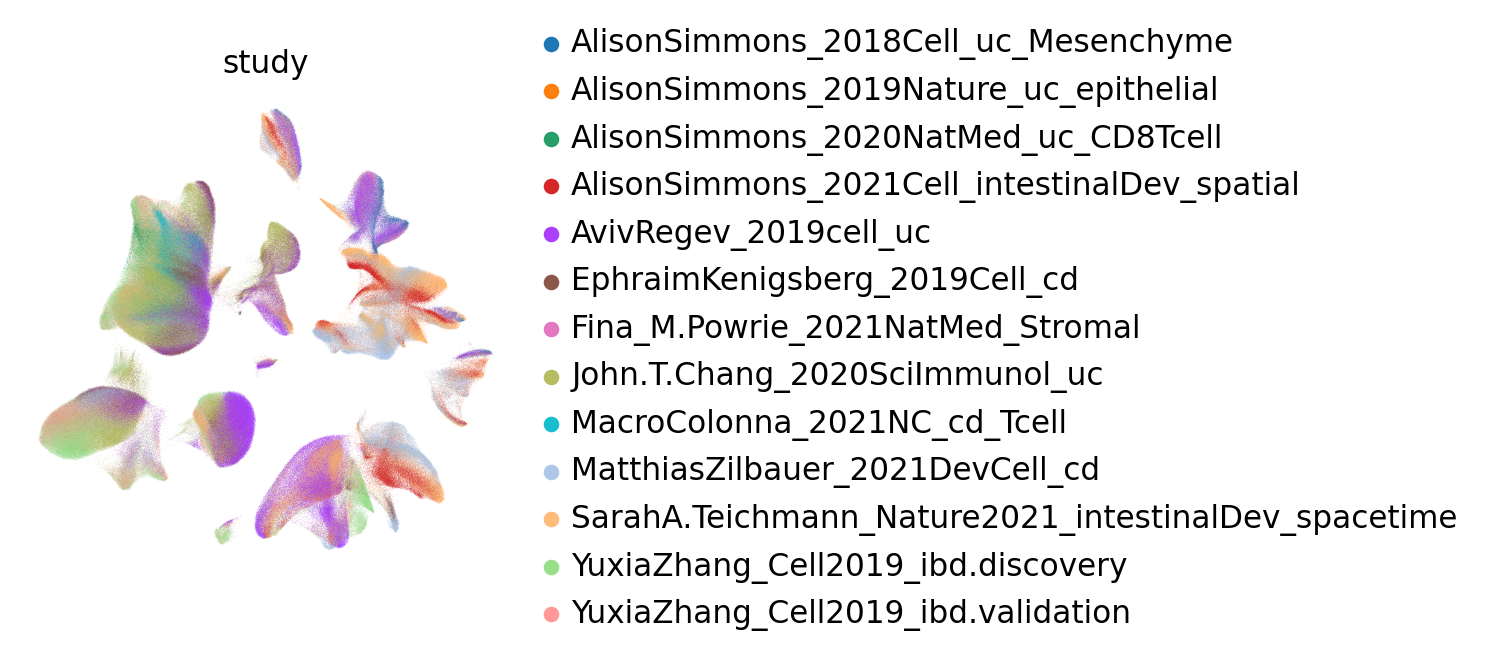

In [39]:
## check batch
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"], frameon=False, legend_fontsize=14)

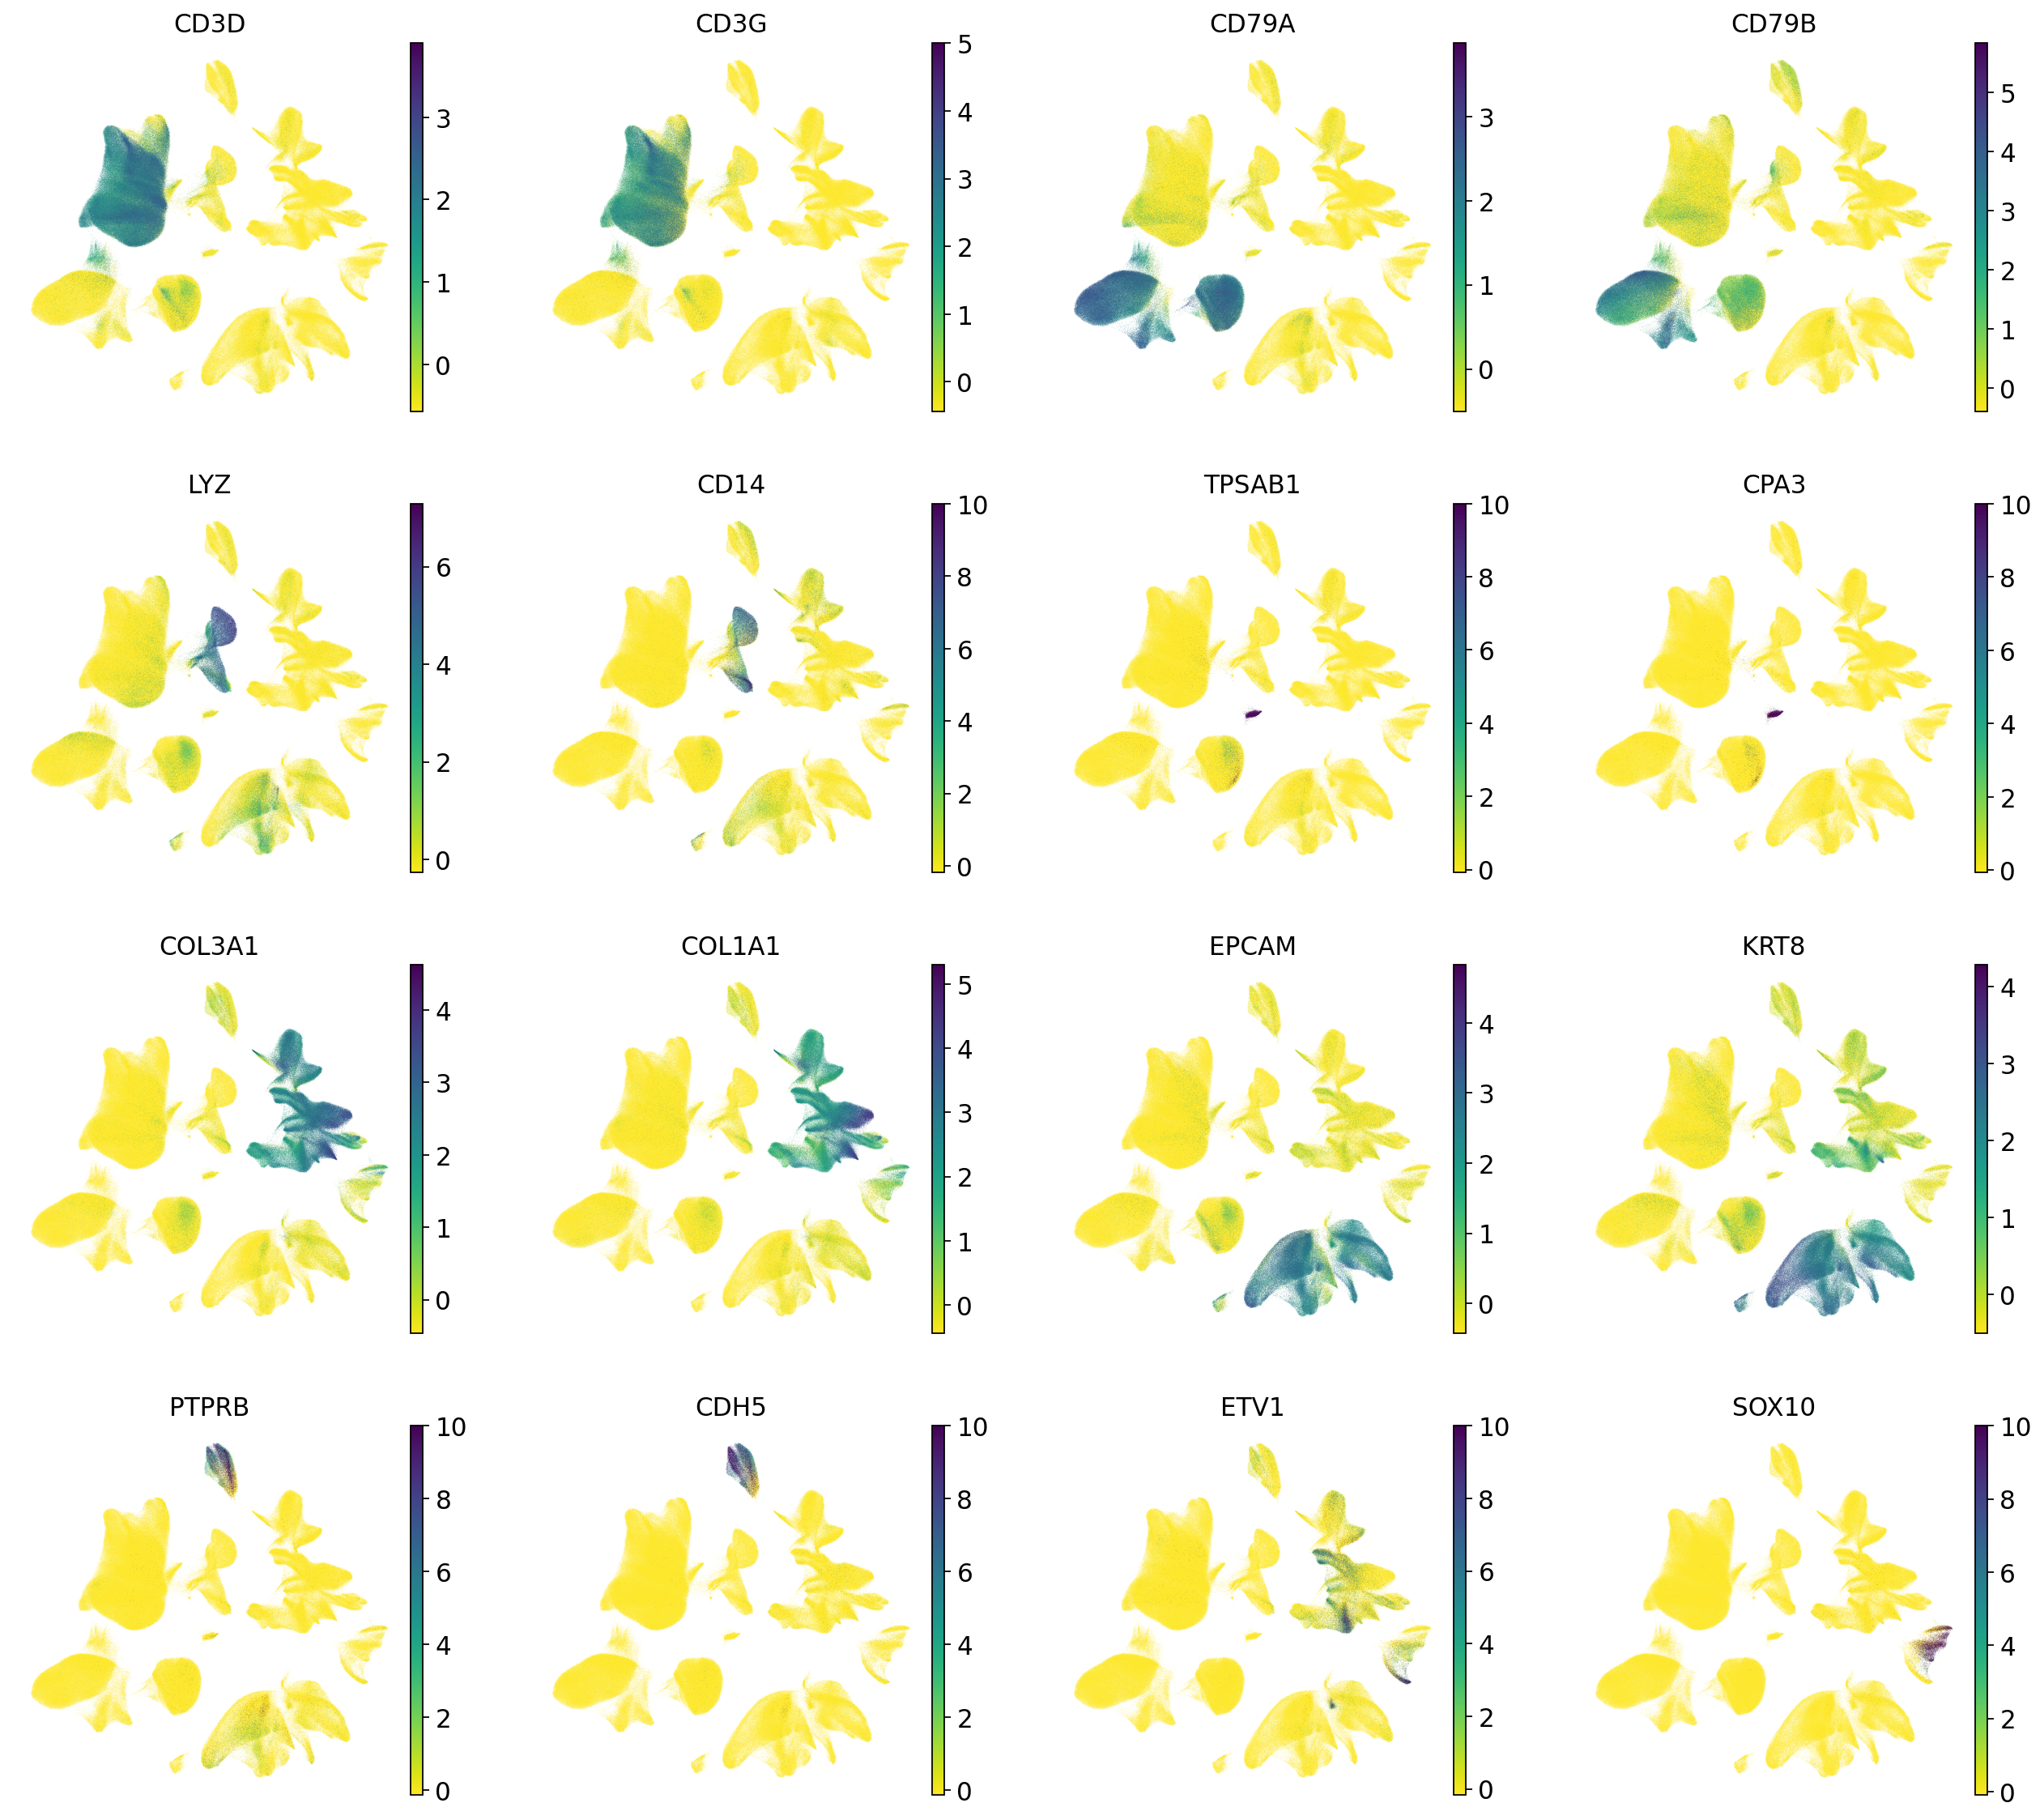

In [27]:
## plot
major_markers = ["CD3D","CD3G",## T_NK
                 "CD79A","CD79B",## B and plasma shared
                 "LYZ","CD14", ## Myeloid
                 "TPSAB1","CPA3", ## Mast cells
                 "COL3A1","COL1A1",## Mesenchymal, fibro
                 "EPCAM","KRT8", ## epithlial
                 "PTPRB","CDH5", ## endothelial
                 "ETV1","SOX10", ## Neuronal,     
                ]
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=major_markers, frameon = False)

In [17]:
## explore DEG
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0       1         2         3         4        5       6       7  \
0     CD3E  COL3A1      CD74     PHGR1      MZB1    APOA1  TYROBP   RAMP2   
1     CD3D   CALD1   HLA-DRA    LGALS4      SSR4      TTR    CST3   GNG11   
2     IL32  COL1A2     MS4A1      PIGR   HERPUD1  S100A10  FCER1G   EGFL7   
3      B2M  COL1A1      CD37      KRT8     DERL3    FABP1     FTL   CRIP2   
4      CD7   MFAP4  HLA-DPA1  C15orf48      XBP1   LGALS3     LYZ   CLDN5   
5   TMSB4X   SPARC  HLA-DPB1     KRT18    SEC11C    EPCAM    AIF1  IFITM3   
6  ARHGDIB  COL6A2  HLA-DRB1    S100A6    FKBP11   LGALS2    SAT1  IGFBP7   
7     SRGN  IFITM3     CD79A      ELF3  TNFRSF17     KRT8    LST1  TM4SF1   
8     IL7R  LGALS1  HLA-DQA1     CLDN3    UBE2J1    KRT18    FTH1    CAV1   
9    PTPRC    TPM2  HLA-DQB1     EPCAM   HSP90B1    GSTA1    CTSS  IGFBP4   

        8  
0  TUBA1A  
1   STMN1  
2  TUBB2B  
3     MDK  
4   AP1S2  
5    RBP1  
6    PLP1  
7    SOX4  
8    CNN3  
9     DST

In [18]:
## rename cluster
adata.obs["label"] = "Unknown"
adata.obs.loc[adata.obs.leiden.isin(['0']), "label"] = "T/NK"
adata.obs.loc[adata.obs.leiden.isin(['1']), "label"] = "Mesenchymal"
adata.obs.loc[adata.obs.leiden.isin(['2']), "label"] = "B cells"
adata.obs.loc[adata.obs.leiden.isin(['3','5']), "label"] = "Epithelial"
adata.obs.loc[adata.obs.leiden.isin(['4']), "label"] = "Plasma cells"
adata.obs.loc[adata.obs.leiden.isin(['6']), "label"] = "Myeloid"
adata.obs.loc[adata.obs.leiden.isin(['7']), "label"] = "Endothelial"
adata.obs.loc[adata.obs.leiden.isin(['8']), "label"] = "Neural"
newOrder = ['T/NK', "B cells","Plasma cells","Myeloid",'Mesenchymal',"Epithelial","Endothelial","Neural"]
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

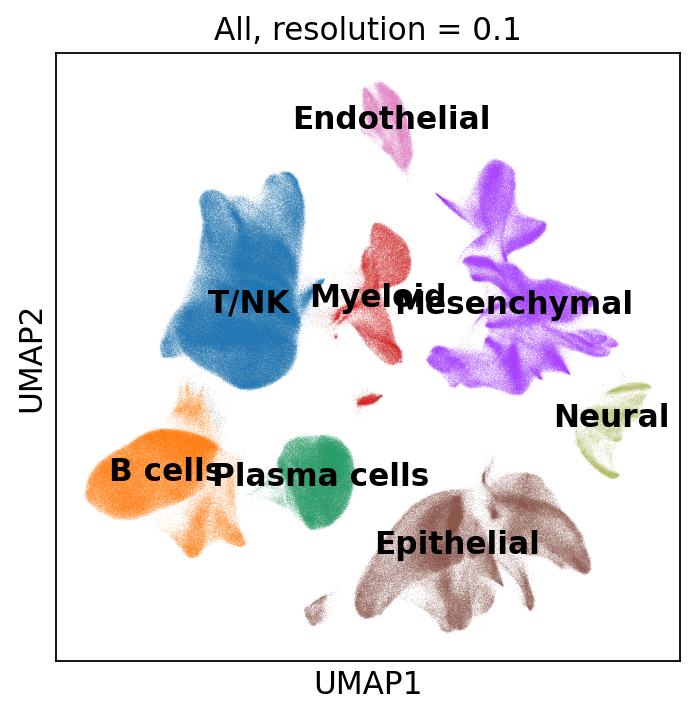

In [19]:
## plot label
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', 
               title='All, resolution = 0.1', frameon=True, legend_fontsize = 14)

In [ ]:
## write adata.obs to file
adata.obs.to_csv("ibd_20220111.bbknn_umap_leiden_marker.adata.obs.csv", header=True, index=True)

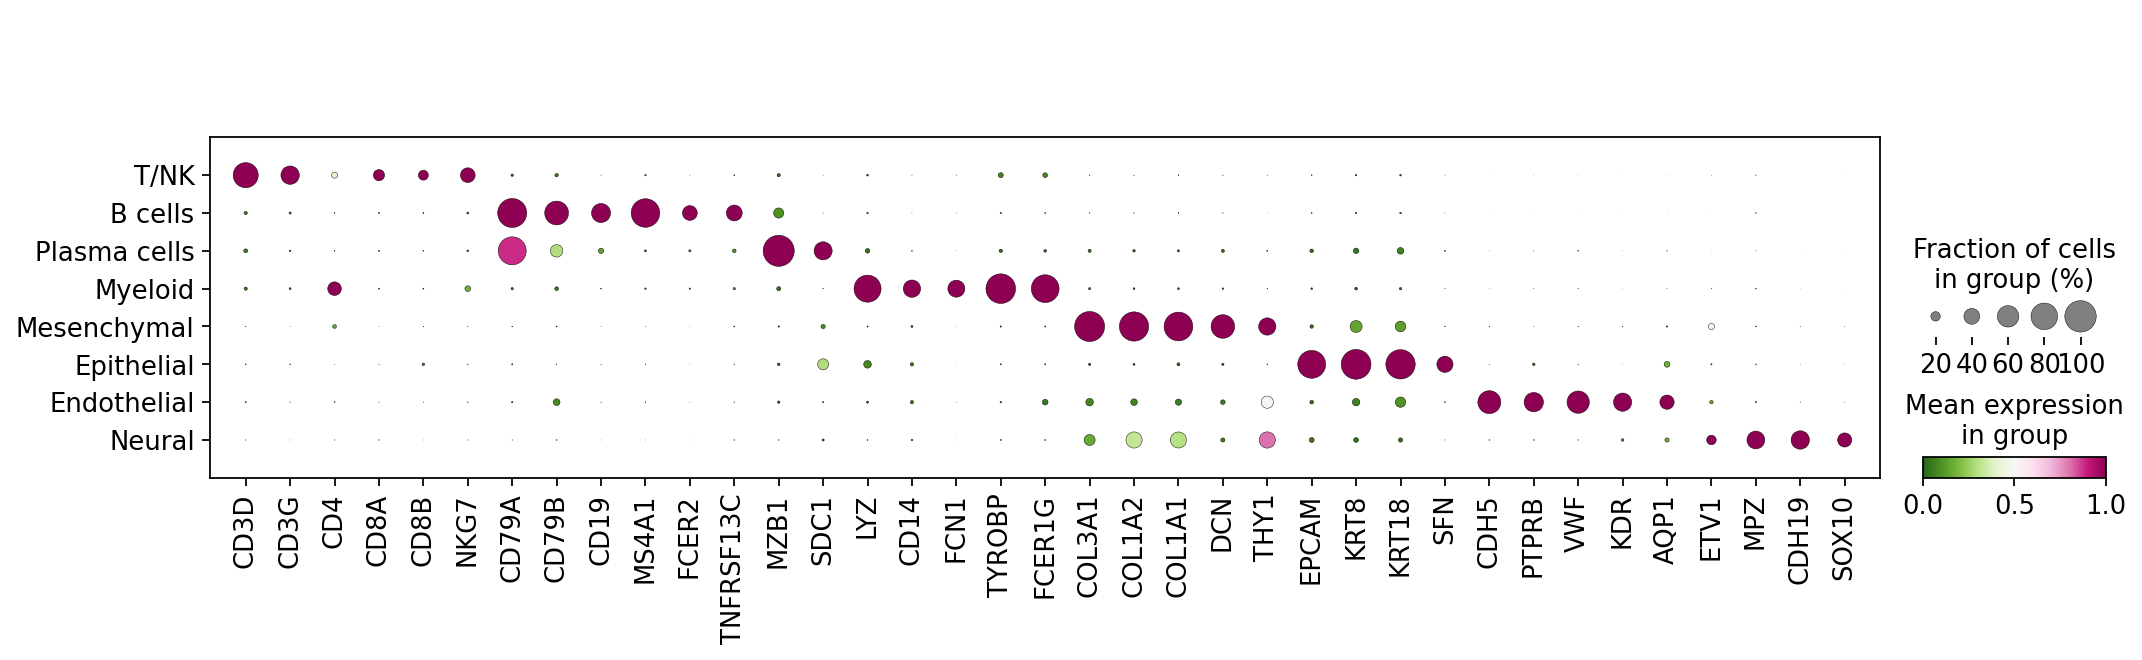

In [20]:
major_markers = ["CD3D","CD3G","CD4","CD8A","CD8B","NKG7",## T_NK
                 "CD79A","CD79B",## B and plasma shared
                 "CD19","MS4A1","FCER2","TNFRSF13C",## B cell specific
                 "MZB1", "SDC1", ## Plasma specific
                 "LYZ","CD14", "FCN1", "TYROBP","FCER1G", ## Myeloid
                 "COL3A1","COL1A2","COL1A1","DCN","THY1", ## Mesenchymal, fibro
                 "EPCAM","KRT8","KRT18","SFN", ## epithlial
                 "CDH5","PTPRB","VWF", "KDR","AQP1", ## endothelial
                 "ETV1","MPZ","CDH19","SOX10" ## Neuronal
                ]
sc.pl.dotplot(adata, major_markers, groupby='label', dendrogram=False, standard_scale = 'var', cmap = 'PiYG_r')

In [21]:
marker_genes_dict = {
    'T/NK': ['CD3D', 'CD3G','NKG7'],
    'B cells': ['CD79A', 'CD79B','CD19','MS4A1'],
    'Plasma cells': ['MZB1','SDC1'],
    'Myeloid': ['LYZ', 'CD14','FCN1','FCER1G'],
    'Mesenchymal': ['COL3A1','COL1A1','COL1A2','DCN'],
    'Epithelial': ['EPCAM','KRT8','KRT18','SFN'],
    'Endothelial': ['CDH5','PTPRB','VWF','KDR'],
    'Neuronal':['ETV1','MPZ','CDH19','SOX10'],
}

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_label']`
categories: T/NK, B cells, Plasma cells, etc.
var_group_labels: T/NK, B cells, Plasma cells, etc.


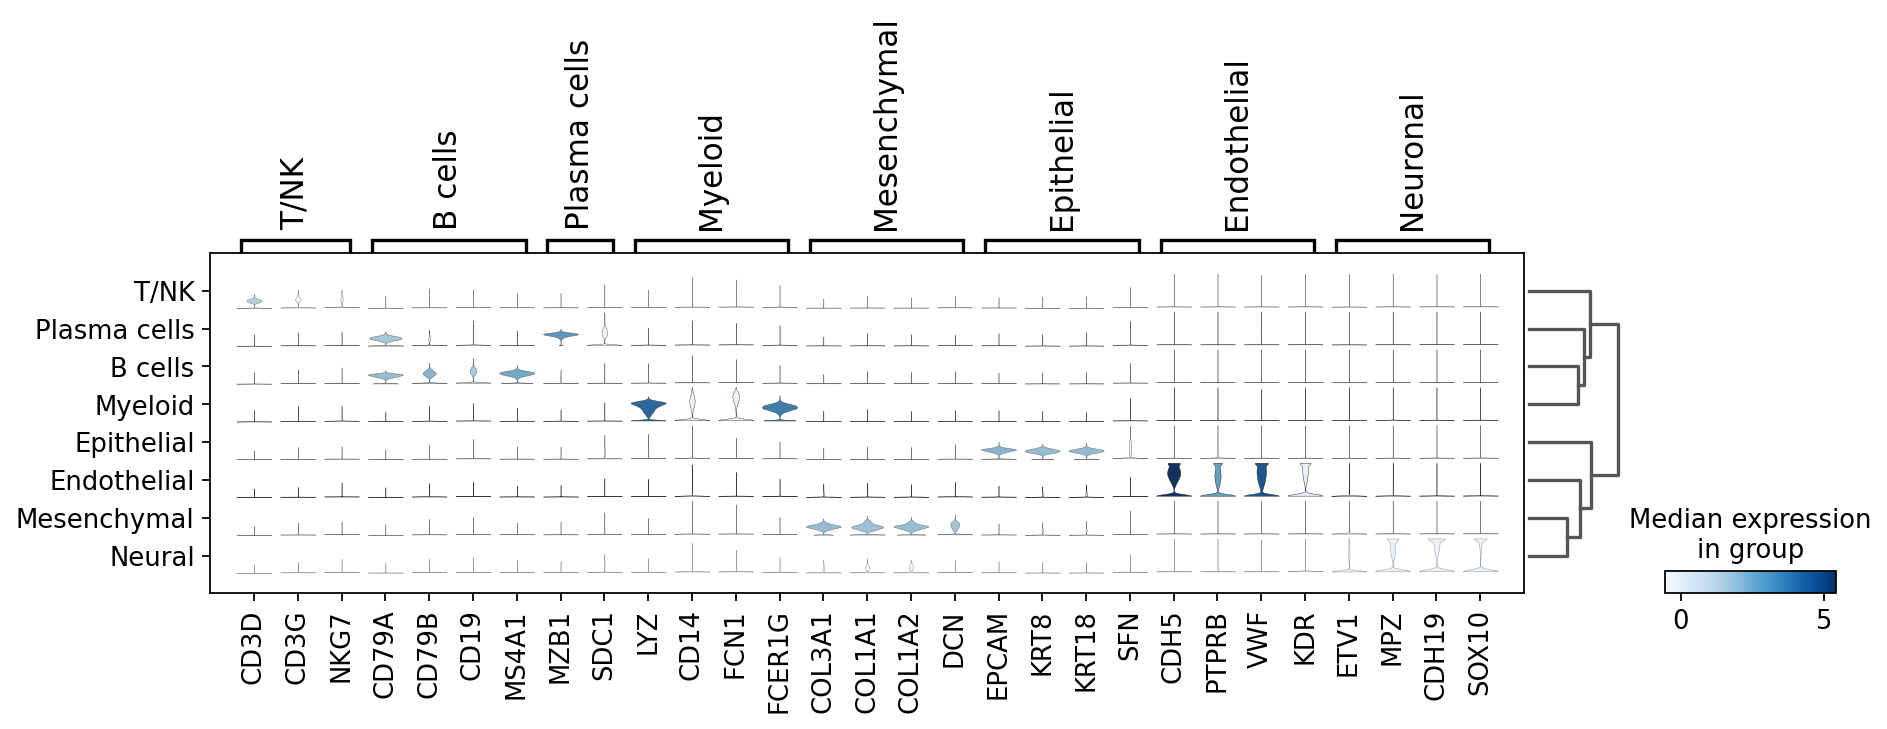

In [22]:
# stacked-violin plot
ax = sc.pl.stacked_violin(adata, marker_genes_dict, groupby='label', swap_axes=False, dendrogram=True, save = ".pdf")